In [1]:
import pickle
import lzma

with lzma.open('params_with_f_k=2_2024-05-16 11:02:53.201499.xz', 'rb') as f:
    params = pickle.load(f)

In [1]:
import pickle
import lzma

with lzma.open('params_with_f_k=2_2024-05-06 10:13:31.086363.xz', 'rb') as f:
    params = pickle.load(f)

In [2]:
locals().update(params)

In [3]:
k

2

In [4]:
with lzma.open('movie_data_movielens.xz', 'rb') as f:
    train_movie_ratings_list, test_movie_ratings_list = pickle.load(f)

with lzma.open('user_data_movielens.xz', 'rb') as f:
    train_user_ratings_list, test_user_ratings_list = pickle.load(f)

In [5]:
movie_ratings_list = [a+b for a, b in zip(train_movie_ratings_list, test_movie_ratings_list)]
del train_movie_ratings_list, test_movie_ratings_list

In [6]:
movie_indices = []
for index, movie in enumerate(movie_ratings_list):
    if len(movie) > 500:
        movie_indices.append(index)

In [7]:
popular_movies = V[movie_indices]

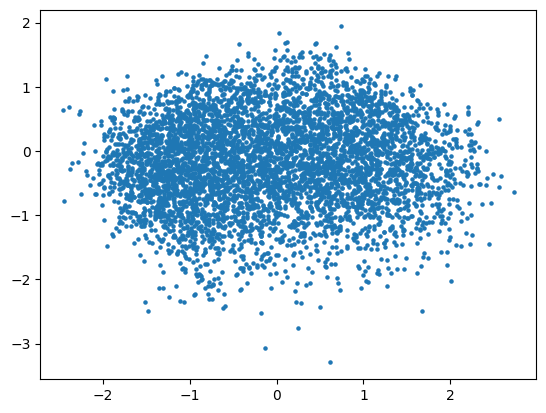

In [8]:
import matplotlib.pyplot as plt
plt.scatter(popular_movies[:, 0], popular_movies[:, 1], s=5)
plt.show()

In [9]:
with open('indices.pkl', 'rb') as f:
    horror_indices, children_indices = pickle.load(f)

In [10]:
valid_children_movie_indices = []
valid_horror_movie_indices = []
genre = []
for val in movie_indices:
    if val in horror_indices:
        valid_horror_movie_indices.append(val)
        genre.append('horror')
    elif val in children_indices:
        valid_children_movie_indices.append(val)
        genre.append('children')

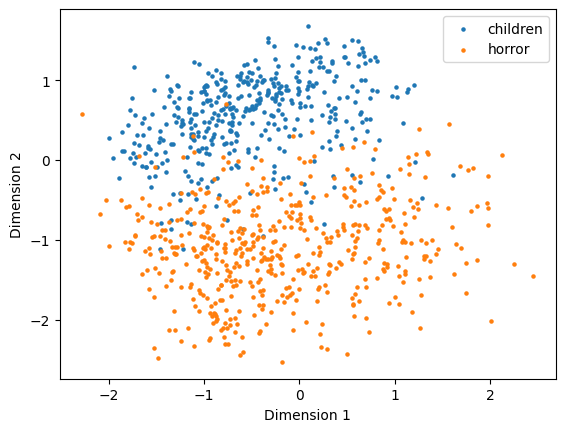

In [11]:
import matplotlib.pyplot as plt
popular_children_movies = V[valid_children_movie_indices]
popular_horror_movies = V[valid_horror_movie_indices]
plt.scatter(popular_children_movies[:, 0], popular_children_movies[:, 1], s=5, label='children')
plt.scatter(popular_horror_movies[:, 0], popular_horror_movies[:, 1], s=5, label='horror')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
# plt.show()
plt.savefig('item_embeddings.pdf', bbox_inches='tight')